# Main Notebook Summary

This notebook offers a comprehensive guide through a data processing and modeling project, structured into key sections:

## Data Processing
- **Collection & Processing**: Utilizes `src.dataset.creation` for data collection and `src.dataset.processing` for processing, summarizing the data.

## Dataset and Overlap
- **Dataset Creation**: Demonstrates dataset creation and printing using `src.dataset.torch` and `src.dataset.torch_overlap`.

## Data Synchronization
- **Synchronization**: Features data synchronization with `src.fabric_sync.data_sync`.

## Modeling
- **Training & Usage**: Details model training (LSTM, neural networks) via `src.machine_learning.train_models` and their application through `src.machine_learning.use_models`.

## Analytics and Reporting
- **Analysis & Visualization**: Engages in data analysis (`src.analytics.analytics`), visualization (`src.analytics.graphs`), and reporting (`src.utils.reporting`).

Explore and run the cells to delve into the project's data handling, modeling, and analytical aspects.

---
## Data Process:

### Data Collection:

In [1]:
import nba_analytics.dataset.creation as dc

dc.collect_data()

| 2024-07-05 17:13:23,025 - INFO - creation.update_players_csv:
---| Appending new data to data/datasets/nba_players_basic.csv for year 2001
| 2024-07-05 17:13:23,529 - INFO - creation.update_players_csv:
---| Appending new data to data/datasets/nba_players_advanced.csv for year 2001
| 2024-07-05 17:13:24,171 - INFO - creation.update_players_csv:
---| Data saved to data/datasets/nba_players_basic.csv and data/datasets/nba_players_advanced.csv for year 2001
| 2024-07-05 17:13:29,646 - INFO - creation.update_players_csv:
---| Appending new data to data/datasets/nba_players_basic.csv for year 2002
| 2024-07-05 17:13:30,142 - INFO - creation.update_players_csv:
---| Appending new data to data/datasets/nba_players_advanced.csv for year 2002
| 2024-07-05 17:13:30,788 - INFO - creation.update_players_csv:
---| Data saved to data/datasets/nba_players_basic.csv and data/datasets/nba_players_advanced.csv for year 2002
| 2024-07-05 17:13:36,201 - INFO - creation.update_players_csv:
---| Appending

### SQL Import Stats

In [ ]:
from nba_analytics.dataset.sql import csv_to_sql
from nba_analytics.utils.config import settings
from nba_analytics.utils import filename_grabber

settings.cloud.SQL_SERVER_NAME = ''
settings.cloud.SQL_DATABASE_NAME = ''
settings.cloud.SQL_TABLE_NAME = ''
settings.cloud.SQL_USERNAME = ''
settings.cloud.SQL_PASSWORD = ''

basic_path = filename_grabber.get_data_file('bronze', settings.PLAYERS_BASIC_NAME)
advanced_path = filename_grabber.get_data_file('bronze', settings.PLAYERS_ADVANCED_NAME)

csv_to_sql(basic_path, advanced_path)

### Bronze To Silver

In [1]:
from nba_analytics.dataset import bronze_to_silver as b2s

# Run the processing
b2s.run_processing()

           slug  Year  age  minutes_played  made_field_goals  \
6594  adamsst01  2014   20            1197                93   
7142  adamsst01  2015   21            1771               217   
7717  adamsst01  2016   22            2014               261   
8246  adamsst01  2017   23            2389               374   
8787  adamsst01  2018   24            2487               448   

      attempted_field_goals  attempted_three_point_field_goals  \
6594                    185                                  0   
7142                    399                                  2   
7717                    426                                  0   
8246                    655                                  1   
8787                    712                                  2   

      attempted_free_throws  defensive_rebounds  turnovers  \
6594                    136                 190         71   
7142                    205                 324         99   
7717                    196     

### Silver to Gold

In [1]:
from nba_analytics.dataset import silver_to_gold as s2g

s2g.run_processing()

| 2024-07-24 23:59:39,195 - INFO - silver_to_gold.log_summary:
---|          slug  Year  age  minutes_played  made_field_goals  \
5448  acyqu01  2013   22             342                42   
5917  acyqu01  2014   23              61                 6   
6399  acyqu01  2015   24            1287               152   
6891  acyqu01  2016   25             876               119   
7368  acyqu01  2017   26              48                 5   

      attempted_field_goals  attempted_three_point_field_goals  \
5448                     75                                  2   
5917                     14                                  5   
6399                    331                                 60   
6891                    214                                 49   
7368                     17                                  7   

      attempted_free_throws  defensive_rebounds  turnovers  \
5448                     38                  47         17   
5917                      8           

(           slug  Year  age  minutes_played  made_field_goals  \
 5448    acyqu01  2013   22             342                42   
 5917    acyqu01  2014   23              61                 6   
 6399    acyqu01  2015   24            1287               152   
 6891    acyqu01  2016   25             876               119   
 7368    acyqu01  2017   26              48                 5   
 ...         ...   ...  ...             ...               ...   
 7852  zubaciv01  2017   19             609               126   
 8392  zubaciv01  2018   20             410                61   
 8922  zubaciv01  2019   21             516               112   
 9451  zubaciv01  2020   22            1326               236   
 9991  zubaciv01  2021   23            1609               257   
 
       attempted_field_goals  attempted_three_point_field_goals  \
 5448                     75                                  2   
 5917                     14                                  5   
 6399            

### Data to SQL

In [1]:
# import nba_analytics.dataset.sql
from nba_analytics.dataset.sql import create_sql_table, view_table
from nba_analytics.utils.config import settings
from nba_analytics.utils import filename_grabber

data_file = filename_grabber.get_data_file()
table = settings.azure.SQL_TABLE_NAME

create_sql_table(data_file, table)

data = view_table(table)

print(data)

| 2024-07-16 19:52:58,964 - INFO - sql.get_engine:
---| Creating SQL engine with the following parameters:                
Driver: {ODBC Driver 17 for SQL Server}                
Server: nbasqlserver.database.windows.net                
Database: playerdata                
User: ahernandezjr0                
Password: GMofEden28
2024-07-16 19:53:04,785 INFO sqlalchemy.engine.Engine SELECT CAST(SERVERPROPERTY('ProductVersion') AS VARCHAR)
2024-07-16 19:53:04,786 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-07-16 19:53:04,824 INFO sqlalchemy.engine.Engine SELECT schema_name()
2024-07-16 19:53:04,824 INFO sqlalchemy.engine.Engine [generated in 0.00085s] ()
2024-07-16 19:53:04,941 INFO sqlalchemy.engine.Engine SELECT CAST('test max support' AS NVARCHAR(max))
2024-07-16 19:53:04,942 INFO sqlalchemy.engine.Engine [generated in 0.00095s] ()
2024-07-16 19:53:04,980 INFO sqlalchemy.engine.Engine SELECT 1 FROM fn_listextendedproperty(default, default, default, default, default, default, defau

,slug,name,positions,age,team,games_played,games_started,minutes_played,made_field_goals,attempted_field_goals,...,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player,is_combined_totals


### Dataset Creation

In [ ]:
from nba_analytics.dataset import torch as t
from nba_analytics.dataset import torch_overlap as to

# dataset = dt.create_dataset()

t.print_dataset_example()

to.print_dataset_example()

| 2024-06-28 01:14:30,941 - INFO - torch.print_dataset_example:
---| Testing creation of NBAPlayerDataset class...
| 2024-06-28 01:14:30,944 - INFO - torch.create_dataset:
---| Creating dataset...
| 2024-06-28 01:14:30,945 - INFO - torch.create_dataset:
---| Loading data from data/nba_player_stats_5years.csv, data/nba_player_stats_5years_tensor_ready.csv, and data/nba_player_stats_5years.json...
| 2024-06-28 01:14:31,055 - INFO - torch.create_dataset:
---| Dataset created successfully.
| 2024-06-28 01:14:31,078 - INFO - torch.print_dataset_example:
---| Player Data:
tensor([ 0.5405,  0.1341,  1.2991,  1.2505,  0.5679, -0.9306,  1.0175,  0.7062,
         0.7140,  1.2769,  1.0023,  0.8792], dtype=torch.float64)
Players Targets:
tensor([[-0.1277, -1.3487, -0.3164, -0.8599, -0.9176, -0.9441, -0.0947, -0.0685,
         -0.1996, -0.5963,  1.0653, -0.6374],
        [ 0.0394, -0.9780,  0.4025, -0.1227, -0.3144, -0.9306,  0.4169,  0.8667,
          0.2492, -0.0184,  1.1072, -0.3485],
        [ 

---
## Modeling:

In [ ]:
from nba_analytics.machine_learning import train_models as tm

# Use:
   # 1. 'nn_lstm' for the LSTM model 
   # 2. 'custom_lstm' for the custom LSTM model
   # 3. 'nn_one_to_one' for the one to one neural network model
   # 4. 'nn_many_to_one' for the many to one neural network model
model = tm.run_model('nn_lstm', 100)
model = tm.run_model('nn_one_to_one', 100)
model = tm.run_model('nn_many_to_one', 100)

| 2024-06-28 02:08:30,604 - INFO - train_models.run_model:
---| Running nn_one_to_one model on cpu...
| 2024-06-28 02:08:30,604 - INFO - train_models.run_model:
---| Hyperparameters: input_size=12, hidden_size=12, output_size=12, num_layers=5.
                Using learning rate of: 0.01.
                Using device: cpu.
                Training DataLoader length: 44
                Test DataLoader length: 44


| 2024-06-28 02:08:34,682 - INFO - train_models.run_model:
---| Training model (starting loop)...


Epoch: 100/100, Batch: 44/44: 100%|██████████| 100/100 [01:22<00:00,  1.22it/s, Loss=0.349]

| 2024-06-28 02:09:56,694 - INFO - train_models.run_model:
---| Evaluating model...



Batch: 44/44: 100%|██████████| 44/44 [00:34<00:00,  1.26it/s, Loss=0.509]

| 2024-06-28 02:10:31,623 - INFO - train_models.run_model:
---| Saving model at data/models/nn_one_to_one.pth.
| 2024-06-28 02:10:31,634 - INFO - train_models.run_model:
---| Confirmation: Model saved at data/models/nn_one_to_one.pth.


In [ ]:
from nba_analytics.machine_learning import use_models as um

um.use_model(-1)

| 2024-06-23 22:14:39,151 - INFO - use_models.use_model:
---| Found .pth files: ['nn_lstm.pth', 'nn_many_to_one.pth', 'nn_one_to_one.pth']
| 2024-06-23 22:14:39,152 - INFO - use_models.use_model:
---| Using argument file index -1.
| 2024-06-23 22:14:39,152 - INFO - use_models.load_model:
---| Loading nn_one_to_one.pth and creating model...
| 2024-06-23 22:14:39,241 - INFO - use_models.load_model:
---| Loaded model: CustomNN(
  (fc1): Linear(in_features=12, out_features=12, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=12, out_features=12, bias=True)
)
| 2024-06-23 22:14:39,242 - INFO - torch.get_dataset_example:
---| Getting example from dataset...
| 2024-06-23 22:14:39,242 - INFO - torch.create_dataset:
---| Creating dataset...
| 2024-06-23 22:14:39,243 - INFO - torch.create_dataset:
---| Loading data from data/nba_player_stats_5years.csv, data/nba_player_stats_5years_tensor_ready.csv, and data/nba_player_stats_5years.json...
| 2024-06-23 22:14:39,298 - INFO - torch.create_d

---
## Analytics and Reporting:

In [ ]:
from nba_analytics.analytics import analytics as an
from nba_analytics.analytics import graphs as graphs

graphs.create_pca_plot()
graphs.create_data_graphs()

| 2024-06-28 02:14:54,894 - INFO - use_models.use_model:
---| Found .pth files: ['nn_lstm.pth', 'nn_many_to_one.pth', 'nn_one_to_one.pth']
| 2024-06-28 02:14:54,894 - INFO - use_models.use_model:
---| Using all indices (-1 given).
| 2024-06-28 02:14:54,900 - INFO - use_models.load_model:
---| Loading nn_lstm.pth and creating model...
| 2024-06-28 02:14:54,909 - INFO - use_models.load_model:
---| Loaded model: LSTM(12, 12, num_layers=5, batch_first=True)
| 2024-06-28 02:14:54,909 - INFO - torch_overlap.get_dataset_example:
---| Getting example from dataset...
| 2024-06-28 02:14:54,909 - INFO - torch_overlap.create_dataset:
---| Creating dataset...
| 2024-06-28 02:14:54,917 - INFO - torch_overlap.create_dataset:
---| Loading data from nba_player_stats_5years.csv, nba_player_stats_5years_overlap.csv, and nba_player_stats_5years.json...
| 2024-06-28 02:14:55,282 - INFO - torch_overlap.create_dataset:
---| Dataset created successfully.
| 2024-06-28 02:14:55,374 - INFO - use_models.use_model

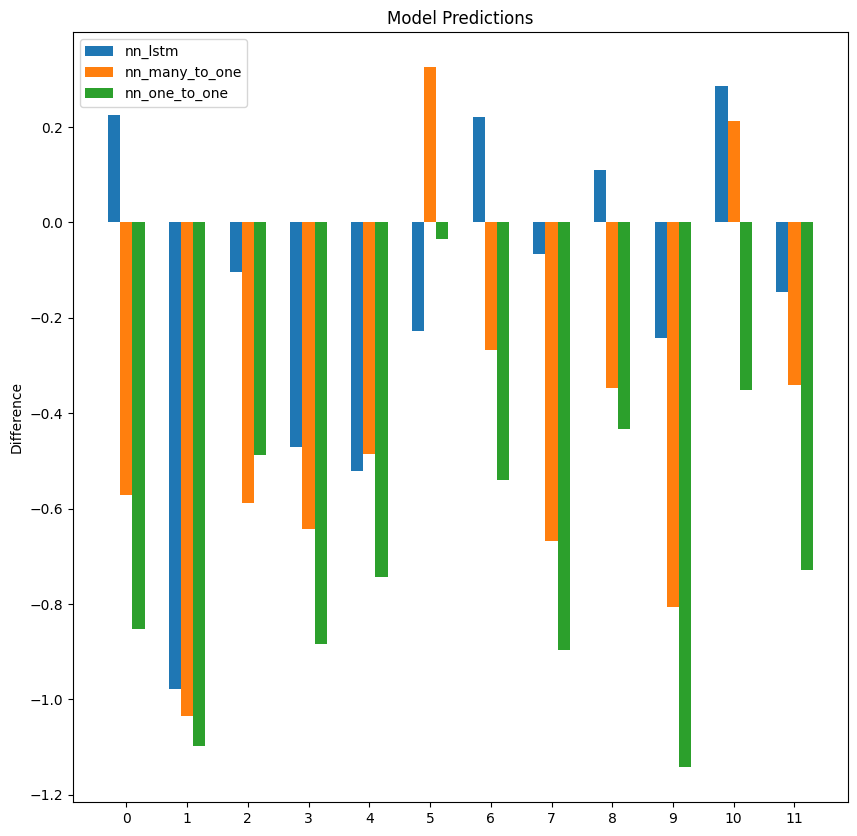

In [ ]:
from nba_analytics.analytics import graphs as graphs

graphs.create_prediction_graphs()

In [ ]:
# Create report
from nba_analytics.utils.reporting import create_report

create_report()